# Chapter 19: Social Network Analysis

## Import required packages

In [1]:
!pip install dmba
!pip install networkx

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import dmba

import networkx as nx

## Hypothetical LinkedIn network
 

In [3]:
# Build a dataframe that shows the network
df = pd.DataFrame({
    'from': ['Dave', 'Peter', 'John', 'Dave', 'Dave', 'Peter', 'Sam', 'Peter'],
    'to': ['Jenny', 'Jenny', 'Jenny', 'Peter', 'John', 'Sam', 'Albert', 'John']
})

# show it
df

,from,to
0,Dave,Jenny
1,Peter,Jenny
2,John,Jenny
3,Dave,Peter
4,Dave,John
5,Peter,Sam
6,Sam,Albert
7,Peter,John


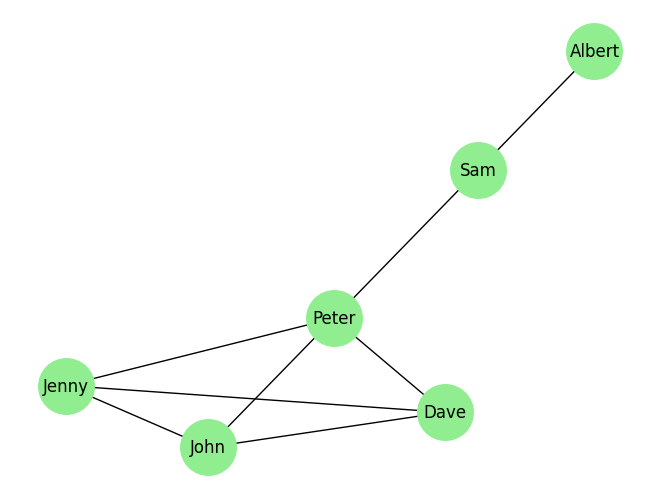

In [4]:
# use nx.from_pandas_edgelist(), for the df dataframe, indicate 'from' and 'to' for the edge list
# define G to store it
G = nx.from_pandas_edgelist(df, 'from', 'to')

# plot with nx.draw(), for G
# setting: with_labels=True, node_color='skyblue', node_size=1600
nx.draw(G, with_labels=True, node_size=1600, node_color='lightgreen')

# plt.show()


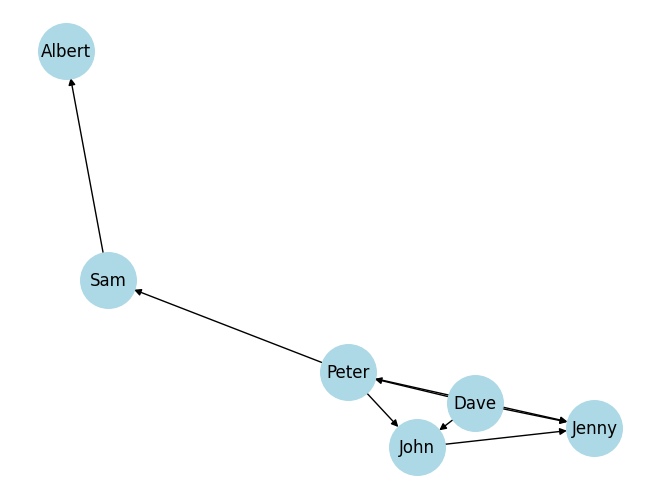

In [5]:
# use nx.from_pandas_edgelist(), for the df dataframe, indicate 'from' and 'to' for the edge list
# setting: create_using=nx.DiGraph(), to create a directed graph
# redefine G
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())

# plot with nx.draw(), for G
# setting: with_labels=True, node_color='skyblue', node_size=1600
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)

# plt.show()



**---- Back to PPT ----**

## Drug network in San Antonio

In [21]:
# load data drug.csv, defined as drug_df
drug_df = pd.read_csv('drug.csv')

# preview it

drug_df.head()

,Entity,Related Entity,Relationship,Descrption,Related Entity Address 1,Related Entity Address 2,Related Address 3
0,6451 Babcock Road,Q & M LLC,Owner,Current Owner,10 Kings Heath,NaN,NaN
1,Q & M LLC,10 Kings Heath,Address,NaN,NaN,NaN,NaN
2,Maurico Sanchez,Q & M LLC,Managing Member,10 Kings Heath,11706 Mission Trace Street,NaN,NaN
3,Hilda Riebeling,Q & M LLC,Manager,10 Kings Heath,"1162 E Sonterra Boulevard, Suite 100",NaN,NaN
4,Ponte Vedra Apartments,Q & M LLC,Spinoff?,"8018 Broadway Street, Suite 200",NaN,NaN,NaN


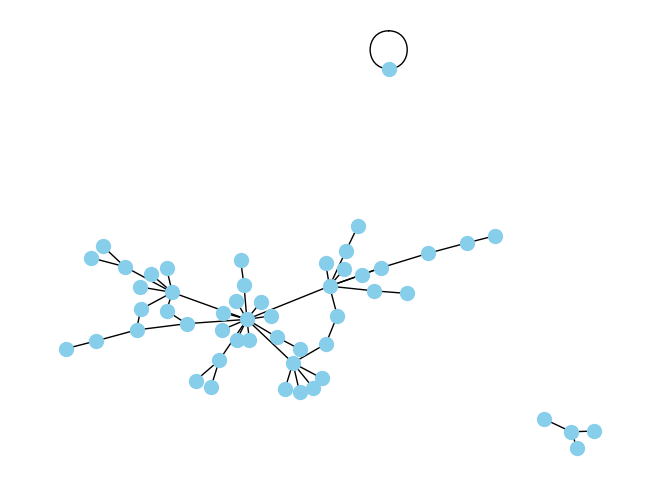

In [25]:
# use nx.from_pandas_edgelist(), for the drug_df dataframe, indicate 'Entity' and 'Related Entity' for the edge list
# define G
G = nx.from_pandas_edgelist(drug_df, 'Entity', 'Related Entity')
G
# plot with nx.draw(), for G
# setting: with_labels=False, node_color='skyblue', node_size=100
nx.draw(G, node_color='skyblue', node_size=100)

# plt.show()



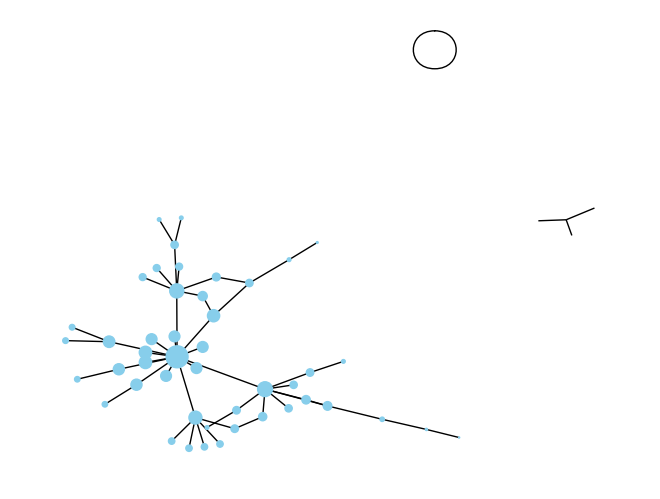

In [32]:
# use nx.eigenvector_centrality(), for G
# how influential a node is in a network
# define centrality to store it
centrality = nx.eigenvector_centrality(G)
centrality
# plot with nx.draw(), for G
# setting: with_labels=False, node_color='skyblue', node_size=[400*centrality[n] for n in G.nodes()]
# G.nodes() returns a list of all nodes in the graph
# centrality[n] is the centrality value for node n
nx.draw(G, node_color='skyblue', node_size=[400*centrality[n] for n in G.nodes()])

# plt.show()


In [35]:
pd.DataFrame({
    'centrality':centrality
}).sort_values('centrality', ascending=False)

,centrality
10 Kings Heath,6.232739e-01
Arturo Madrigal,2.842651e-01
Alejandro Sanchez,2.567153e-01
Q & M LLC,2.185429e-01
Alvaro Garcia de Quevedo,1.977799e-01
"A G Q FULL SERVICE, LLC",1.977799e-01
CANTINA LATINA HOLDINGS LTD,1.930326e-01
Mauricio Sanchez,1.698488e-01
"CANTINA LATINA TEXAS, LLC",1.593862e-01
Joseph Blaha,1.593862e-01


## Back to the LinkedIn Data

### Different layouts

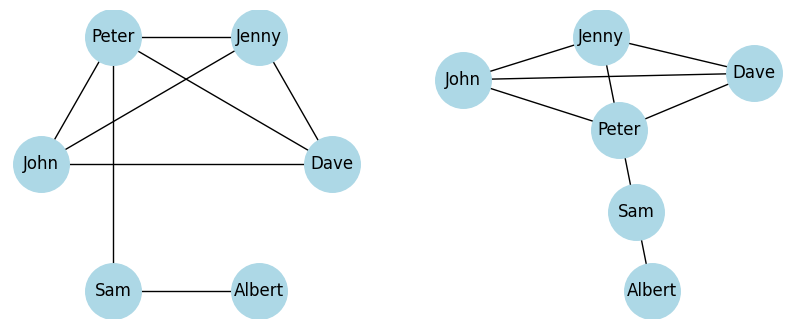

In [40]:
# use nx.from_pandas_edgelist(), for the df dataframe, indicate 'from' and 'to' for the edge list
# define G
G = nx.from_pandas_edgelist(df, 'from', 'to')

# use plt.subplots(), 1 row 2 columns, setting: figsize=(10, 4) 
# define fig, axes to store the plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# plot with nx.draw_circular(), for G
# setting: with_labels=True, node_color='skyblue', node_size=1600, ax=axes[0])
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=1600, ax=axes[0])

# plot with nx.draw_kamada_kawai(), for G
# setting: with_labels=True, node_color='skyblue', node_size=1600, ax=axes[1]
nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=1600, ax=axes[1])

# plt.tight_layout()
# plt.show()
# try: width=[] in nx.draw() and G.edges()

### Adjacency matrix

In [42]:
# use nx.from_pandas_edgelist(), for the df dataframe, indicate 'from' and 'to' for the edge list
# setting: create_using=nx.DiGraph(), to create a directed graph
# define G
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())

# show nx.to_numpy_array(G) 
nx.to_numpy_array(G)
# use dataframe to show the matrix, set index and columns, same as list(G.nodes())
pd.DataFrame(nx.to_numpy_array(G), index=G.nodes() , columns=G.nodes())


,Dave,Jenny,Peter,John,Sam,Albert
Dave,0.0,1.0,1.0,1.0,0.0,0.0
Jenny,0.0,0.0,0.0,0.0,0.0,0.0
Peter,0.0,1.0,0.0,1.0,1.0,0.0
John,0.0,1.0,0.0,0.0,0.0,0.0
Sam,0.0,0.0,0.0,0.0,0.0,1.0
Albert,0.0,0.0,0.0,0.0,0.0,0.0


### Metrics for nodes & edges


Degree
[('Dave', 3), ('Jenny', 3), ('Peter', 4), ('John', 3), ('Sam', 2), ('Albert', 1)]

Closeness
{'Dave': 0.625, 'Jenny': 0.625, 'Peter': 0.8333333333333334, 'John': 0.625, 'Sam': 0.625, 'Albert': 0.4166666666666667}


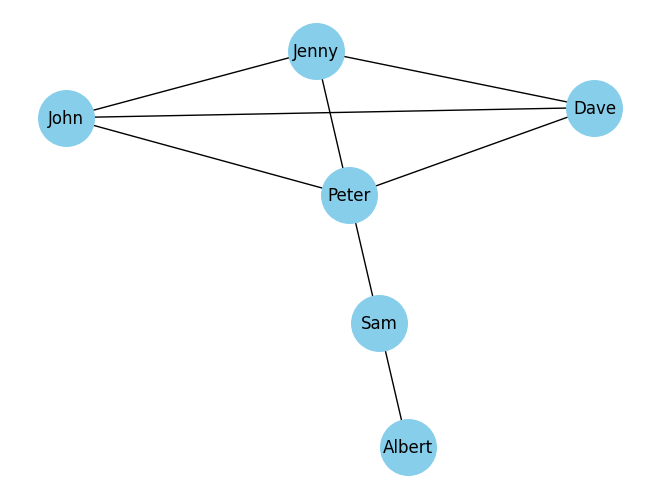

In [44]:
# use nx.from_pandas_edgelist(), for the df dataframe, indicate 'from' and 'to' for the edge list
# define G
G = nx.from_pandas_edgelist(df, 'from', 'to')

# Degree: the number of edges connected to it
# print, 'Degree:'
# print, use G.degree()
# print, add an empty line
print('Degree')
print(G.degree())
print()
# Closeness: Reciprocal of avg. shortest path to all other nodes 
# print, 'Closeness:'
# print, use nx.closeness_centrality(G) 
print('Closeness')
print(nx.closeness_centrality(G))

# plot with nx.draw_kamada_kawai(), for G
# setting: with_labels=True, node_color='skyblue', node_size=1600
nx.draw_kamada_kawai(G, with_labels=True, node_color='skyblue', node_size=1600)

In [45]:
# Betweenness: the extent to which a given node is on shortest paths between other nodes 
# print, 'Betweenness:'
# print, use nx.betweenness_centrality(G) 
# print, add an empty line
print('Betweenness:')
print(nx.betweenness_centrality(G))
# Eigenvector centrality: the extent to which a given node is well-connected to other notes 
# print, 'Eigenvector centrality:'
# print, use nx.eigenvector_centrality(G) 
print('Eigenvector Centrality')
print(nx.eigenvector_centrality(G))

Betweenness:
{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 0.6000000000000001, 'John': 0.0, 'Sam': 0.4, 'Albert': 0.0}
Eigenvector Centrality
{'Dave': 0.478095053500941, 'Jenny': 0.478095053500941, 'Peter': 0.524235713786943, 'John': 0.478095053500941, 'Sam': 0.18901359222624448, 'Albert': 0.06104209856994265}


In [46]:
# print, use G.nodes()

print(G.nodes())

['Dave', 'Jenny', 'Peter', 'John', 'Sam', 'Albert']


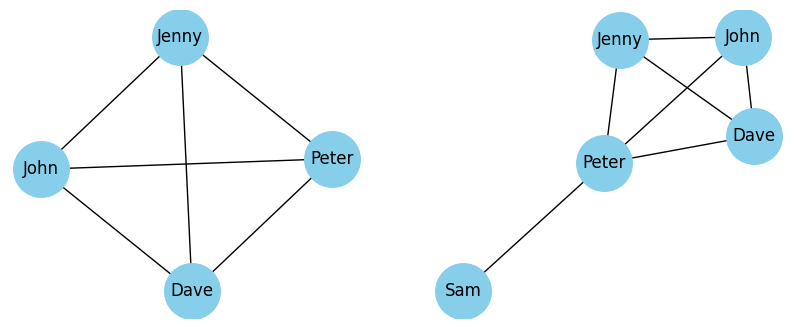

In [49]:
# use plt.subplots(), 1 row 2 columns, setting: figsize=(10, 4) 
# define fig, axes to store the plots

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# use nx.ego_graph(), for G, focus on 'Dave'
# define G_ego to store it

G_ego = nx.ego_graph(G, 'Dave')
# plot with nx.draw(), for G_ego
# setting: with_labels=True, node_color='skyblue', node_size=1600, ax=axes[0])
nx.draw(G_ego, with_labels=True, node_color='skyblue', node_size=1600, ax=axes[0])

# use nx.ego_graph(), for G, focus on 'Dave', set radius=2 (a bigger area) 
# define G_ego to store it
G_ego = nx.ego_graph(G, 'Dave', radius=2)
nx.draw(G_ego, with_labels=True, node_color='skyblue', node_size=1600, ax=axes[1])
# plot with nx.draw(), for G_ego
# setting: with_labels=True, node_color='skyblue', node_size=1600, ax=axes[1])



### Network metrics

In [50]:
# Degree distribution: the distribution of degrees of nodes
# show G.degree()

G.degree()

DegreeView({'Dave': 3, 'Jenny': 3, 'Peter': 4, 'John': 3, 'Sam': 2, 'Albert': 1})

In [53]:
# convert it into a dataframe, use dictionary format {}, with 'Degree' as the column name
# use dict(G.degree())

pd.DataFrame({
    'Degree' : dict(G.degree())
}).value_counts('Degree').sort_index()

Degree
1    1
2    1
3    3
4    1
Name: count, dtype: int64

In [17]:
# identity the frequency distribution of degree
# use value_counts() on the Degree column, use sort_index()



In [54]:
# density: Ratio of actual edges to all possible edges
# use nx.density(), for G

nx.density(G)

0.5333333333333333

In [55]:
# get egocentric network with nx.ego_graph(G, n), then calculate nx.density()
# use list comprehension, for n in G.nodes()


[nx.density(nx.ego_graph(G, n)) for n in G.nodes()]

[1.0, 1.0, 0.7, 1.0, 0.6666666666666666, 1.0]

In [61]:
# create a dataframe, dictionary format, within it, keep using dictionaries
# columns include 'Degree', 'Closeness', 'Betweenness', 'Eigenvector Centrality', and 'Ego Network Density'
# use dictionary comprehension to get {n: nx.density(...) ...)}

a = pd.DataFrame({
    'Degree': dict(G.degree()),
    'Closeness': nx.closeness_centrality(G),
    'Betweeness': nx.betweenness_centrality(G),
    'Eigenvector Centrality': nx.eigenvector_centrality(G),
    'Density': {n: nx.density(nx.ego_graph(G, n)) for n in G.nodes()}
})

In [62]:
a.corr()

,Degree,Closeness,Betweeness,Eigenvector Centrality,Density
Degree,1.000000,0.918559,0.388514,0.950518,-0.210090
Closeness,0.918559,1.000000,0.713746,0.757339,-0.578941
Betweeness,0.388514,0.713746,1.000000,0.085778,-0.953970
Eigenvector Centrality,0.950518,0.757339,0.085778,1.000000,0.081106
Density,-0.210090,-0.578941,-0.953970,0.081106,1.000000
